# JupyterLite で学ぶ matplotlib 入門チュートリアル

このノートブックは、**JupyterLite（ブラウザだけで動く Jupyter 環境）** 上で、
Python の可視化ライブラリ **matplotlib** の基本的な使い方を学ぶためのチュートリアルです。

次のような内容をカバーします。
- 基本の折れ線グラフ
- タイトル・軸ラベル・凡例
- 散布図・棒グラフ・ヒストグラム・箱ひげ図
- サブプロット（複数グラフの配置）
- 時系列データの可視化
- 画像の保存

JupyterLite 上でそのまま実行しながら学んでください。

## 0. 環境準備（JupyterLite 用）

このノートブックは **JupyterLite（Pyodide）** を想定しています。

まず、必要なライブラリをインストール（またはロード）します。
環境によってはすでにインストール済みの場合もあります。

In [1]:
# 必要に応じて piplite を使ってパッケージをロード/インストールします。
try:
    import piplite
    await piplite.install(["numpy", "pandas", "matplotlib", "seaborn", "japanize-matplotlib-jlite"])
except ImportError:
    # piplite が無い環境（ローカル Jupyter など）の場合はそのまま続行します
    pass


### 0.1 インポートと日本語表示設定

matplotlib に加えて、補助的に `numpy`・`pandas`・`seaborn` をインポートします。
日本語が文字化けしないように、`japanize_matplotlib_jlite` を最後に読み込みます。

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import japanize_matplotlib_jlite  # 日本語表示用（必ず最後に）

# 図のサイズなど、表示設定（必要に応じて調整）
plt.rcParams["figure.figsize"] = (6, 4)
sns.set(style="whitegrid")


## 1. 基本の折れ線グラフ

まずは、最も基本的な **折れ線グラフ** から始めます。
`plt.plot(x, y)` で描画し、`plt.show()` で表示します。

### 1.1 シンプルな折れ線グラフ

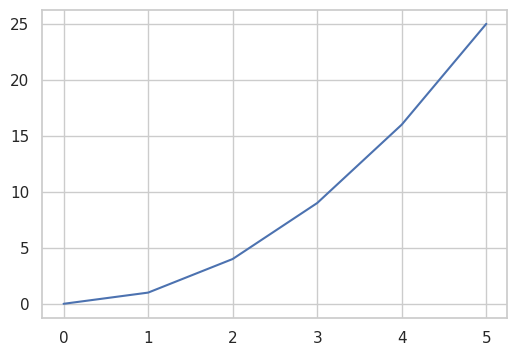

In [3]:
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]

plt.plot(x, y)
plt.show()


### 1章 練習問題

1. `y = x` の直線を、x = 0〜10 の範囲で折れ線グラフとして描きなさい。
2. `y = x^2` と `y = x^3` を同じグラフ上に重ねて描き、形の違いを観察しなさい。
3. 折れ線グラフが「ギザギザしている」ように見えるのを滑らかにしたければ、どのように x の値を用意すればよいか、考えを書きなさい。

## 2. タイトル・軸ラベル・凡例

グラフを読みやすくするためには、タイトルや軸ラベルを設定することが重要です。
- `plt.title("タイトル")`
- `plt.xlabel("X軸ラベル")`
- `plt.ylabel("Y軸ラベル")`
- `plt.legend()` で凡例を表示します。

### 2.1 タイトルと軸ラベルの追加

/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPyth

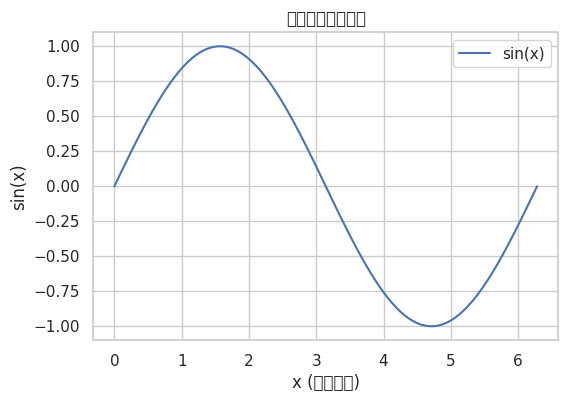

In [4]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y, label="sin(x)")
plt.title("サイン波のグラフ")
plt.xlabel("x (ラジアン)")
plt.ylabel("sin(x)")
plt.legend()
plt.show()


### 2章 練習問題

1. `y = cos(x)` のグラフを描き、タイトルと軸ラベルを適切に設定しなさい。
2. `sin(x)` と `cos(x)` を同じグラフ上に表示し、それぞれに凡例ラベルを付けて区別できるようにしなさい。
3. グラフのタイトルを日本語にしたときに文字化けする場合、どのような対策が必要か説明しなさい。

## 3. 散布図・棒グラフ・ヒストグラム・箱ひげ図

matplotlib では、折れ線グラフ以外にもさまざまなグラフを描くことができます。
- 散布図: `plt.scatter`
- 棒グラフ: `plt.bar`
- ヒストグラム: `plt.hist`
- 箱ひげ図: `plt.boxplot`

### 3.1 散布図（scatter）

/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36523 (\N{CJK UNIFIED IDEOGRAPH-8EAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/

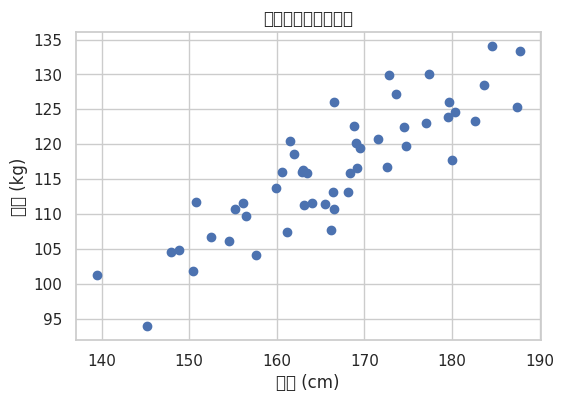

In [5]:
# 身長と体重のダミーデータ
np.random.seed(0)
height = np.random.normal(165, 10, 50)
weight = 0.7 * height + np.random.normal(0, 5, 50)

plt.scatter(height, weight)
plt.xlabel("身長 (cm)")
plt.ylabel("体重 (kg)")
plt.title("身長と体重の散布図")
plt.show()


### 3.2 棒グラフ（bar）

/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12426 (\N{HIRAGANA LETTER RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12496 (\N{KATAKANA LETTER BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPyt

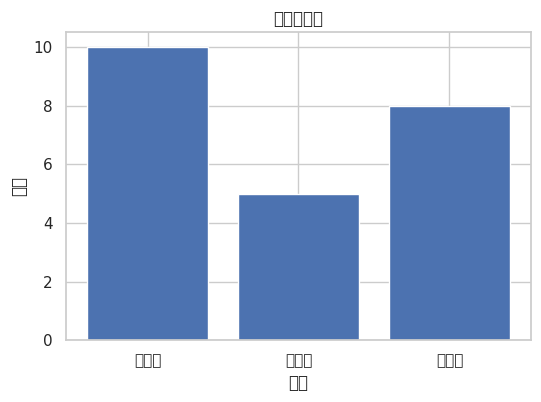

In [6]:
fruits = ["りんご", "バナナ", "みかん"]
counts = [10, 5, 8]

plt.bar(fruits, counts)
plt.xlabel("果物")
plt.ylabel("個数")
plt.title("果物の個数")
plt.show()


### 3.3 ヒストグラム（hist）

/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/

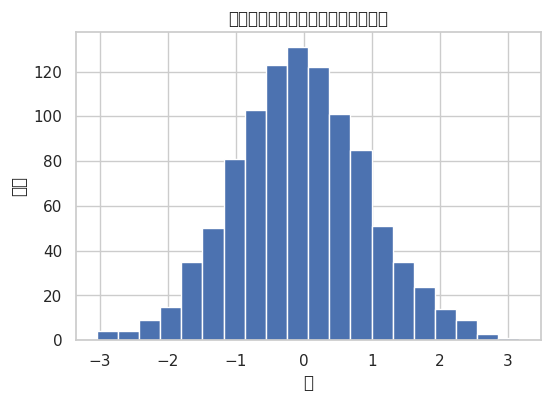

In [7]:
data = np.random.normal(0, 1, 1000)  # 正規分布
plt.hist(data, bins=20)
plt.xlabel("値")
plt.ylabel("頻度")
plt.title("正規分布に従う乱数のヒストグラム")
plt.show()


### 3.4 箱ひげ図（boxplot）

/tmp/ipykernel_5934/3808505494.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2], labels=["グループ1", "グループ2"])


/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.

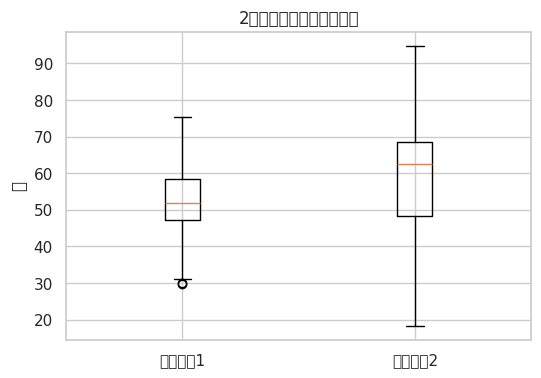

In [8]:
group1 = np.random.normal(50, 10, 100)
group2 = np.random.normal(60, 15, 100)

plt.boxplot([group1, group2], labels=["グループ1", "グループ2"])
plt.ylabel("値")
plt.title("2つのグループの箱ひげ図")
plt.show()


### 3章 練習問題

1. 自分で 3 種類のグループ（例：クラスA, B, C）のテスト得点データを作成し、箱ひげ図で比較しなさい。
2. 身長のダミーデータを作成し、ヒストグラムで分布の形を確認しなさい（ビン数を変えてみる）。
3. 散布図を使って、x と y の間に正の相関・負の相関・ほとんど相関がない場合の例をそれぞれ作成しなさい。

## 4. サブプロット（複数グラフの配置）

1 つの図の中に複数のグラフを配置するには、`plt.subplot` や `plt.subplots` を使います。

### 4.1 plt.subplot を使った簡単な例

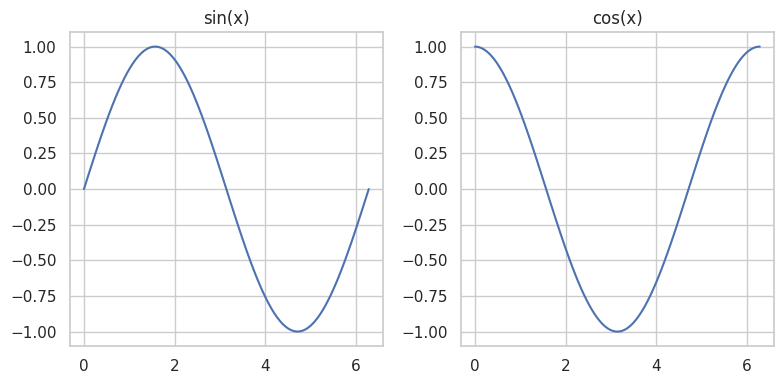

In [9]:
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(8, 4))

# 左側に sin
plt.subplot(1, 2, 1)
plt.plot(x, y1)
plt.title("sin(x)")

# 右側に cos
plt.subplot(1, 2, 2)
plt.plot(x, y2)
plt.title("cos(x)")

plt.tight_layout()
plt.show()


### 4章 練習問題

1. 2行1列（縦に2つ）のサブプロットを作り、上に `sin(x)`、下に `cos(x)` を表示しなさい。
2. 2行2列（合計4つ）のサブプロットを作り、それぞれに違う種類のグラフ（折れ線・散布図・ヒストグラム・箱ひげ図など）を配置しなさい。
3. サブプロットが重なって見にくいときの対処法として `plt.tight_layout()` の役割を説明しなさい。

## 5. pandas と組み合わせた可視化

pandas の DataFrame から直接 matplotlib を使ってグラフを描くこともよくあります。
ここでは、簡単な売上データを DataFrame で作成し、折れ線グラフや棒グラフとして可視化します。

### 5.1 日次売上データの可視化

In [10]:
date_index = pd.date_range(start="2023-01-01", periods=30, freq="D")
np.random.seed(1)
sales = np.random.randint(50, 150, size=30)

df_sales = pd.DataFrame({"sales": sales}, index=date_index)
df_sales.head()


,sales
2023-01-01,87
2023-01-02,62
2023-01-03,122
2023-01-04,59
2023-01-05,125


/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/

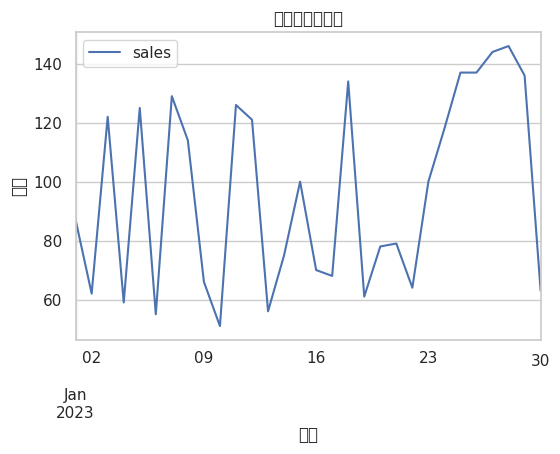

In [11]:
df_sales.plot()
plt.title("日次売上の推移")
plt.xlabel("日付")
plt.ylabel("売上")
plt.show()


### 5.2 カテゴリ別売上の棒グラフ

/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38609 (\N{CJK UNIFIED IDEOGRAPH-96D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36008 (\N{CJK UNIFIED IDEOGRAPH-8CA8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39135 (\N{CJK UNIFIED IDEOGRAPH-98DF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/

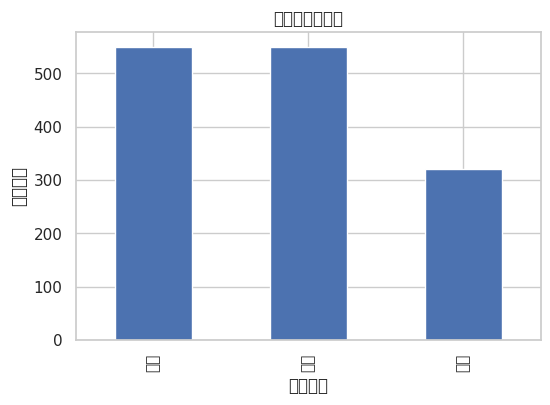

In [12]:
df_cat = pd.DataFrame({
    "category": ["飲料", "食品", "雑貨", "飲料", "食品", "雑貨"],
    "amount": [120, 300, 150, 200, 250, 400]
})

# カテゴリごとの合計
cat_sum = df_cat.groupby("category")["amount"].sum()

cat_sum.plot(kind="bar")
plt.xlabel("カテゴリ")
plt.ylabel("売上合計")
plt.title("カテゴリ別売上")
plt.show()


### 5章 練習問題

1. 自分で日付と売上のデータを作成し、折れ線グラフで可視化しなさい（曜日ごとの差などを想像してデータを作る）。
2. 複数の店舗の売上データ（列に店舗A, B, C など）を持つ DataFrame を作り、`df.plot()` で店舗ごとの売上推移を同じグラフ上に表示しなさい。
3. グラフを読み手にとってわかりやすくするために、タイトル・凡例・軸ラベル以外にどのような工夫ができるか考えをまとめなさい。

## 6. スタイル・軸の調整・注釈

グラフの見た目を調整することで、情報をより伝えやすくできます。
- 軸の範囲を設定: `plt.xlim`, `plt.ylim`
- グリッド線: `plt.grid(True)`
- 注釈: `plt.annotate`

### 6.1 軸の範囲とグリッド線

/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/pyth

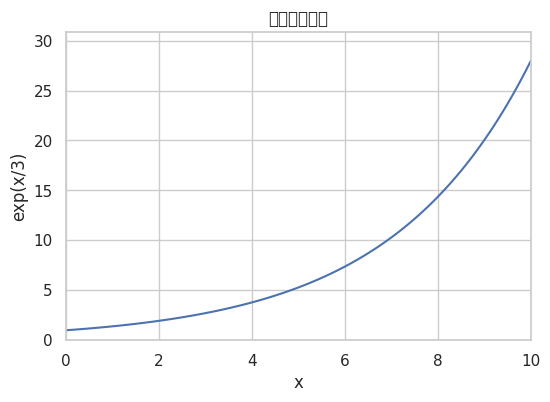

In [13]:
x = np.linspace(0, 10, 100)
y = np.exp(x / 3)

plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(0, y.max() * 1.1)
plt.grid(True)
plt.title("指数関数の例")
plt.xlabel("x")
plt.ylabel("exp(x/3)")
plt.show()


### 6.2 注釈（annotate）の例

/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12500 (\N{KATAKANA LETTER PI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.

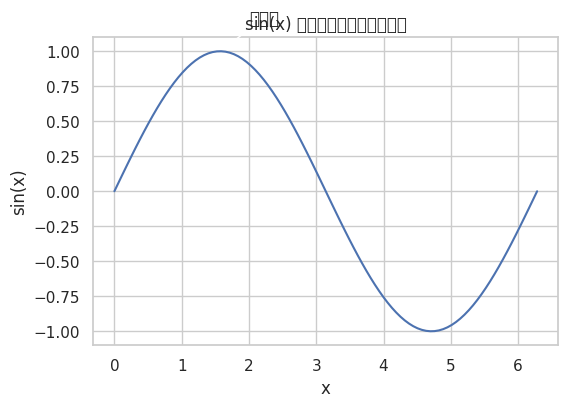

In [14]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("sin(x) のピークに注釈を付ける")

# ピーク（pi/2, 1）の位置に注釈
plt.annotate("ピーク", xy=(np.pi/2, 1), xytext=(2, 1.2),
             arrowprops=dict(arrowstyle="->"))

plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()


### 6章 練習問題

1. 自分で作ったグラフにグリッド線を追加し、軸の範囲を適切に設定しなさい。
2. 時系列グラフの中で、特定の日付の値に注釈（矢印付き）を付けてみなさい。
3. 読み手に強調して伝えたい点がある場合、注釈や色以外にどのような視覚的工夫ができるかを考えてみなさい。

## 7. 画像の保存

作成したグラフをファイルとして保存するには、`plt.savefig("ファイル名.png")` を使います。
JupyterLite では、保存されたファイルはファイルブラウザからダウンロードできます。

### 7.1 PNG 形式で保存

/tmp/ipykernel_5934/1315928463.py:10: UserWarning: Glyph 20445 (\N{CJK UNIFIED IDEOGRAPH-4FDD}) missing from font(s) DejaVu Sans.
  plt.savefig("sample_plot.png")
/tmp/ipykernel_5934/1315928463.py:10: UserWarning: Glyph 23384 (\N{CJK UNIFIED IDEOGRAPH-5B58}) missing from font(s) DejaVu Sans.
  plt.savefig("sample_plot.png")
/tmp/ipykernel_5934/1315928463.py:10: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) DejaVu Sans.
  plt.savefig("sample_plot.png")
/tmp/ipykernel_5934/1315928463.py:10: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from font(s) DejaVu Sans.
  plt.savefig("sample_plot.png")
/tmp/ipykernel_5934/1315928463.py:10: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  plt.savefig("sample_plot.png")
/tmp/ipykernel_5934/1315928463.py:10: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from font(s) DejaVu Sans.
  plt.savefig("sample_plot.png")
/tmp/ipykernel_5934/1315928463.py:10: UserWarni

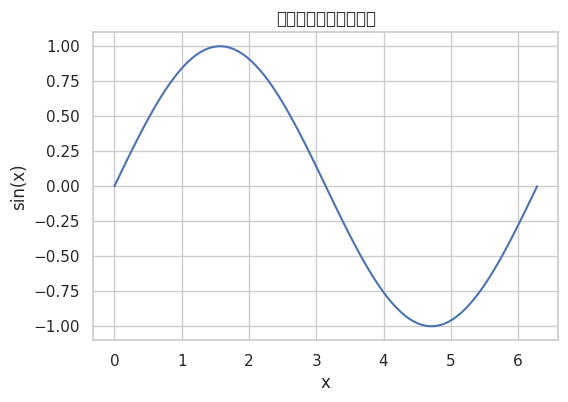

sample_plot.png として保存しました。JupyterLite のファイル一覧からダウンロードできます。


In [15]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("保存用サンプルグラフ")
plt.xlabel("x")
plt.ylabel("sin(x)")

# 画像として保存（JupyterLite のファイルブラウザに表示されます）
plt.savefig("sample_plot.png")
plt.show()

print("sample_plot.png として保存しました。JupyterLite のファイル一覧からダウンロードできます。")


### 7章 練習問題

1. 自分で作成したグラフ（任意）を PNG 形式で保存し、ファイルブラウザからダウンロードして確認しなさい。
2. 論文やレポートに貼り付けることを想定した場合、画像の解像度やサイズ（dpi など）をどのように設定すべきか考えを書きなさい。
3. 同じデータから、読者にとってよりわかりやすい可視化を作るには、どのような点に気を付ける必要があるか、これまでの章の内容を踏まえてまとめなさい。

## 8. 総合ミニ演習

ここまでに学んだ matplotlib の機能を組み合わせて、
自分なりの「ミニ可視化プロジェクト」を作ってみましょう。

### 演習例 1：学習ログの可視化

1. 自分の 1週間または 1ヶ月分の学習時間（科目別などでも良い）を仮想的にデータとして作りなさい。
2. 日次の折れ線グラフ、科目別の棒グラフ、合計時間のヒストグラムなどを作成しなさい。
3. グラフから読み取れる傾向（どの日に多く勉強しているか、どの科目が多いかなど）を文章でまとめなさい。

### 演習例 2：売上・アクセスログのダッシュボード風可視化

1. 日付・売上・アクセス数・新規ユーザ数などの列を持つ DataFrame を作りなさい（ダミーデータで構いません）。
2. サブプロットを使って、売上推移・アクセス推移・売上とアクセスの散布図などを 1つの図にまとめなさい。
3. 可視化結果をもとに、「アクセスが増えると売上も増えるか」「どの期間にトレンドが変化しているか」などをコメントしなさい。

---

これで、JupyterLite 上での **matplotlib 入門チュートリアル** は終了です。

ここで学んだグラフ作成の基礎は、pandas や statsmodels、機械学習ライブラリなどと組み合わせることで、
より高度なデータ分析・可視化へと発展させることができます。

ぜひ、実際のデータや興味のあるテーマに対して、
自分なりのグラフを作成してみてください。